# 2.0 machine learning for regression

In [368]:
import numpy as np
import pandas as pd

In [369]:
data =  'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv'


In [370]:
df = pd.read_csv(data)

In [371]:
df

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


# normalizing the name of the columns

In [372]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [373]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [374]:
df.columns

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')

In [375]:
df

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


In [376]:
#Next, use only the following columns:

#'ram',
#'storage',
#'screen',
#'final_price'
 
df = df.drop(['laptop', 'status', 'brand', 'model', 'cpu', 'storage_type' , 'gpu', 'touch'],axis=1) 
print(df)

      ram  storage  screen  final_price
0       8      512    15.6      1009.00
1       8      256    15.6       299.00
2       8      256    15.6       789.00
3      16     1000    15.6      1199.00
4      16      512    15.6       669.01
...   ...      ...     ...          ...
2155   16     1000    17.3      2699.99
2156   16     1000    17.3      2899.99
2157   32     1000    17.3      3399.99
2158   16     1000    13.4      1899.99
2159   16      256    13.4      1699.99

[2160 rows x 4 columns]


In [377]:
df

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


In [378]:
sel_columns = ['ram','storage','screen','final_price']

In [379]:
df = df[sel_columns]

In [380]:
df

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


In [381]:
df.final_price

0       1009.00
1        299.00
2        789.00
3       1199.00
4        669.01
         ...   
2155    2699.99
2156    2899.99
2157    3399.99
2158    1899.99
2159    1699.99
Name: final_price, Length: 2160, dtype: float64

In [382]:
df.screen

0       15.6
1       15.6
2       15.6
3       15.6
4       15.6
        ... 
2155    17.3
2156    17.3
2157    17.3
2158    13.4
2159    13.4
Name: screen, Length: 2160, dtype: float64

In [383]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='final_price', ylabel='Count'>

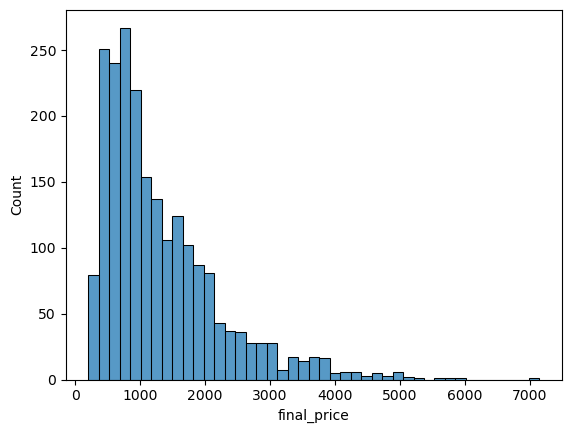

In [384]:
sns.histplot(df.final_price)

# Question 1
There's one column with missing values. What is it?

In [385]:
# screen is the only columns with missing values
df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

# Question 2
What's the median (50% percentile) for variable 'ram'?

In [386]:
df.ram.median()

16.0

#  Prepare and split the dataset

Shuffle the dataset (the filtered one you created above), use seed 42.

In [387]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [388]:
n

2160

In [389]:
n_val, n_test, n_train

(432, 432, 1296)

In [390]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [391]:
idx = np.arange(n)

In [392]:
np.random.seed(42)
np.random.shuffle(idx)

# Question 3
We need to deal with missing values for the column from Q1.

In [415]:
df_train.isnull().sum()

ram            0
storage        0
screen         1
final_price    0
dtype: int64

In [416]:
#df.screen

We have two options: fill it with 0 or with the mean of this variable.

In [ ]:
df_train_1 = df_train.copy()
df_train_2 = df_train.copy()

In [423]:
df_train_1['screen'] = df_train['screen'].fillna(value=0)

In [424]:
df_train['screen'].mean()

15.195791505791505

In [427]:
df_train_2['screen'] = df_train['screen'].fillna(value = df_train['screen'].mean())

In [428]:
df_train_1['screen'].mean()

15.18406635802469

In [429]:
df_train_2['screen'].mean()

15.195791505791505

In [430]:
df_train.isnull().sum()

ram            0
storage        0
screen         1
final_price    0
dtype: int64

 Try both options. For each, train a linear regression model without regularization using the code from the lessons.

In [442]:
feature_col = ['ram', 'storage','screen','final_price']
label_columns = 'final_price'

In [443]:
df.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


In [444]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [445]:
X_train = df_train_1[feature_col].values
y_train = df_train_1[label_columns].values

In [446]:
X_train.shape, y_train.shape

((1296, 4), (1296,))

In [447]:
w0, w = train_linear_regression(X_train, y_train)

In [448]:
w0

2.952305067083216e-11

In [449]:
w

array([-4.80504525e-13,  5.55111512e-15, -3.53139740e-12,  1.00000000e+00])

For computing the mean, use the training only!

In [450]:
df_val_1 = df_val.copy()

In [452]:
df_val_1['screen'].fillna(value=0, inplace=True)
X_val = df_val_1[feature_col].values
y_val = df_val_1[label_columns].values

In [453]:
def predict(X, w0, w):
    y_pred = w0 + X.dot(w)
    return y_pred

In [454]:
y_val_pred = predict(X_val, w0, w)

In [455]:
y_val_pred

array([ 789.84,  714.29,  691.97,  547.19, 2052.74, 1454.12,  499.  ,
        686.45, 1422.  , 1349.  , 2595.  , 1409.  , 1334.  , 1525.  ,
       1497.  , 1615.  , 1475.  , 1639.01, 1259.59, 1044.74, 1177.9 ,
       1237.85, 1091.  ,  915.78, 1383.44, 1231.71, 1007.  , 2450.71,
       1040.55, 1307.01, 1463.4 , 1637.09, 2033.25, 1365.1 , 1675.2 ,
       1715.18, 1190.  , 1848.46, 3469.  , 3936.  ,  926.63,  717.  ,
        930.16,  600.68,  688.88, 1289.17,  919.  , 1091.08, 1895.48,
        887.87, 3012.09, 2818.09, 1369.87, 1323.11, 1779.99, 1581.  ,
        734.64,  397.29, 1093.01, 2835.19, 2317.  , 2228.59, 2299.  ,
       2511.  , 1552.82, 2532.38, 1878.04, 1376.02,  899.  ,  684.93,
        355.01,  367.34,  459.99,  377.  ,  478.45,  581.01,  593.11,
        586.66,  594.22,  709.65,  554.  ,  716.14,  673.37,  600.57,
        614.  ,  601.33,  652.92,  538.98,  335.28,  885.9 ,  451.46,
        378.94,  646.39,  517.01,  354.  ,  403.83,  623.66,  521.75,
        571.39,  542

In [456]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [457]:
acc_1 = rmse(y_val, y_val_pred)

option 2


In [459]:
X_train = df_train_2[feature_col].values
y_train = df_train_2[label_columns].values

In [460]:
df_val_2 = df_val.copy()
df_val_2['screen'].fillna(value=df_val_2['screen'].mean(), inplace=True)
X_val = df_val_2[feature_col].values
y_val = df_val_2[label_columns].values

In [461]:
w0, w = train_linear_regression(X_train, y_train)

In [462]:
y_val_pred = predict(X_val, w0, w)

In [463]:
acc_2 = rmse(y_val, y_val_pred)

In [464]:
round(acc_1, 2), round(acc_2, 2)

(0.0, 0.0)

# Question 4

Now let's train a regularized linear regression.

For this question, fill the NAs with 0

Use RMSE to evaluate the model on the validation dataset.

Round the RMSE scores to 2 decimal digits.

0.01

1

10

100

In [469]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [471]:
X_train = df_train_1[feature_col].values
y_train = df_train_1[label_columns].values

X_val = df_val_1[feature_col].values
y_val = df_val_1[label_columns].values

In [472]:
def get_train_predict_acc(X_train=X_train, y_train=y_train, X_val=X_val, y_val = y_val, r=0):
    w0, w = train_linear_regression_reg(X_train, y_train, r)
    y_val_pred = predict(X_val, w0, w)
    acc = rmse(y_val, y_val_pred)
    return acc
    

In [473]:
# reg_list = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
reg_list = [0, 0.000001, 0.0001, 0.001]
scores = []
for r in reg_list:
    acc = get_train_predict_acc(r=r)
#     print(acc)
    print(round(acc, 9))
    scores.append((r, acc))

0.0
0.0
0.0
2e-09
